# Representação dos dados

Numa fase inicial iremos mostrar algumas representações dos dados que englobam uma grande variedade de páises, iremos ilustrar os 20 países com maior número de casos e tentar uma analise mais profunda dos top 4 países mais Portugal.

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.datasets import make_friedman2
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import time
from datetime import datetime
from scipy import integrate, optimize
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing, linear_model
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import scipy



dados = pd.read_csv("/home/joao/Downloads/download.csv")
dados["dateRep"] = pd.to_datetime(dados.dateRep,format='%d/%m/%Y')


#target = dados["cases"]

#X_train, X_test, y_train, y_test = train_test_split(dados, target, test_size=0.2,shuffle=False)

df_confirmedcases = df_confirmedcases =  dados.groupby(['countriesAndTerritories'])['cases','deaths'].sum().reset_index().sort_values(['cases'],ascending=False)[:20]
ok=df_confirmedcases.set_index('countriesAndTerritories').style.background_gradient(cmap='Oranges')
ok   


,cases,deaths
countriesAndTerritories,,
United_States_of_America,1039909,60966
Spain,212917,24275
Italy,203591,27682
United_Kingdom,165221,26097
Germany,159119,6288
France,128442,24087
Turkey,117589,3801
Russia,99399,972
Iran,93657,5957


In [50]:
all=[]

for country in dados.countriesAndTerritories.unique():
    if country in df_confirmedcases["countriesAndTerritories"].tolist():
        all.append(country)

i = 0
for country in all:
    
    pais = dados.countriesAndTerritories == country
    if i == 0 :
        new = dados[pais]
        i = 1
    else :
        new = new.append(dados[pais])
    
 
#print(all)
new = new.sort_values(['year','month','day'], ascending=[1,1,1])


In [52]:
top_5 = dados[dados.countriesAndTerritories == "United_States_of_America"]
top_5 = top_5.append(dados[dados.countriesAndTerritories == "Portugal"])
top_5 = top_5.append(dados[dados.countriesAndTerritories == "Italy"])
top_5 = top_5.append(dados[dados.countriesAndTerritories == "Spain"])
top_5 = top_5.append(dados[dados.countriesAndTerritories == "United_Kingdom"])



graph = top_5.pivot(index='dateRep', columns='countriesAndTerritories', values='cases')
graph_paises = list(graph.columns)
covid = graph.reset_index('dateRep')
covid.set_index(['dateRep'], inplace=True)
covid.columns = graph_paises
covid.fillna(0,inplace=True)


## O próximo gráfico ilustra o aumento de casos diários ao longo do tempo nos 4 países com mais casos e Portugal

Text(0, 0.5, '# of Daily Cases')

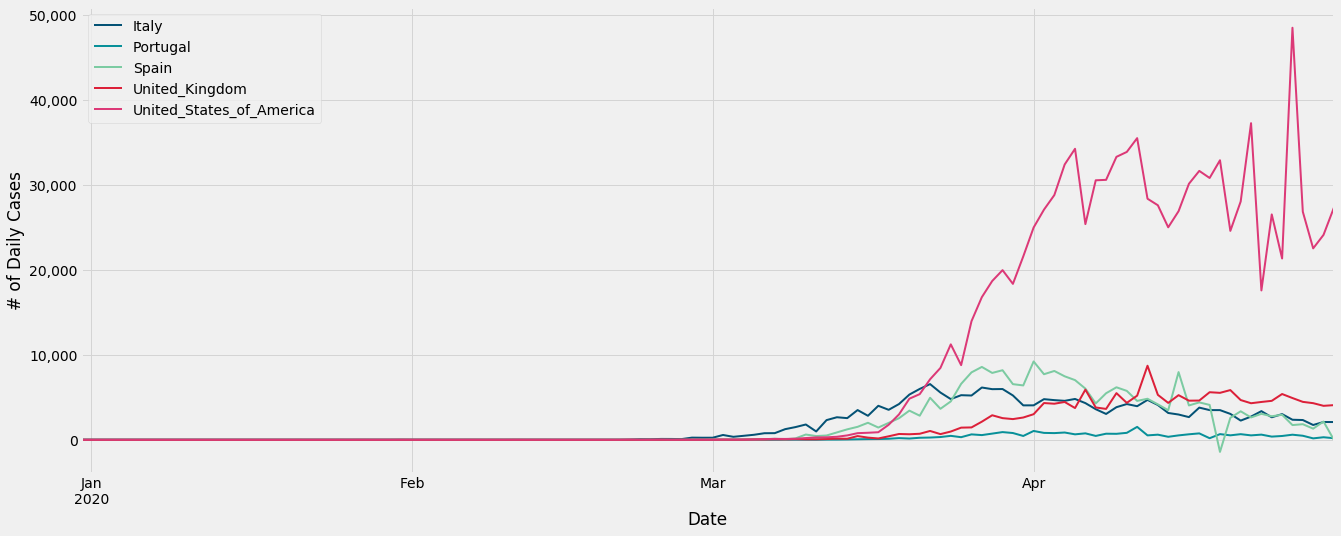

In [53]:
colors = {'Portugal':'#045275', 'Italy':'#089099', 'Spain':'#7CCBA2', 'United_Kingdom':'#DC2039', 'United_States_of_America':'#DC3977'}
plt.style.use('fivethirtyeight')

plot = covid.plot(figsize=(20,8), color=list(colors.values()), linewidth=2, legend=True)
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('Date')
plot.set_ylabel('# of Daily Cases')



In [54]:
graph_d = top_5.pivot(index='dateRep', columns='countriesAndTerritories', values='deaths')
graph_paises_d = list(graph_d.columns)
covid_d = graph_d.reset_index('dateRep')
covid_d.set_index(['dateRep'], inplace=True)
covid_d.columns = graph_paises_d
covid_d.fillna(0,inplace=True)

# O próximo gráfico ilustra o aumento de mortes ao longo do tempo nos 4 países com mais casos e Portugal

Text(0, 0.5, '# of Daily Deaths')

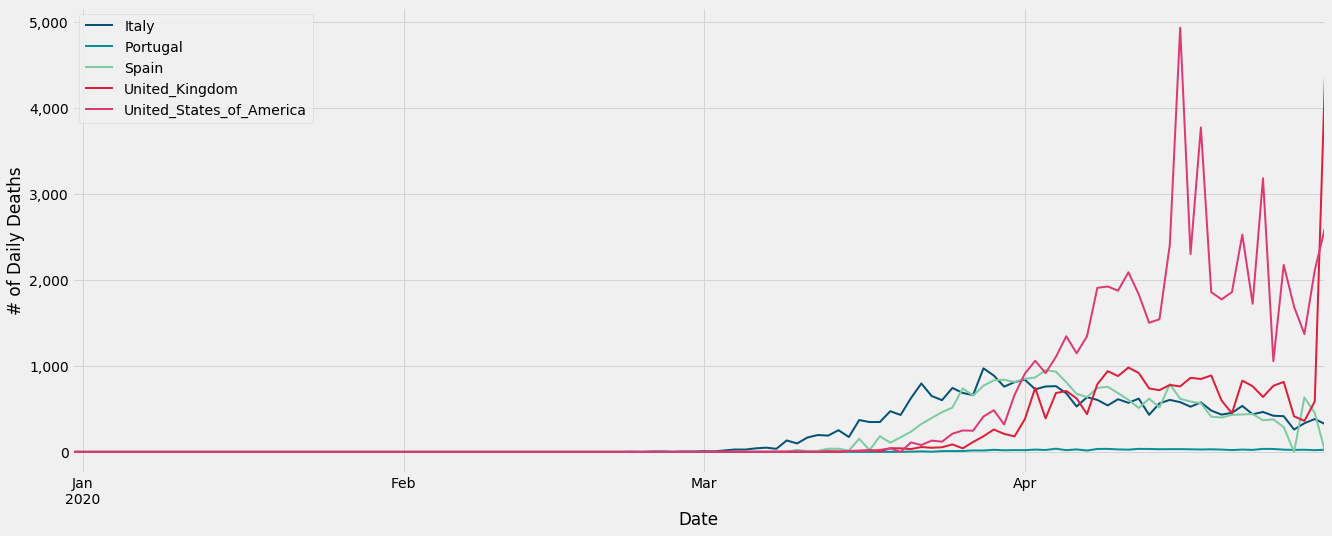

In [55]:
colors = {'Portugal':'#045275', 'Italy':'#089099', 'Spain':'#7CCBA2', 'United_Kingdom':'#DC2039', 'United_States_of_America':'#DC3977'}
plt.style.use('fivethirtyeight')

plot = covid_d.plot(figsize=(20,8), color=list(colors.values()), linewidth=2, legend=True)
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('Date')
plot.set_ylabel('# of Daily Deaths')

# Treino do modelo 

Vamos aplicar modelo de regressão linear aos dataset de Portugal Espanha e dos Estados Unidos, apesar de ter em conta que o crescimento do numero de casos ao longo do tempo aumenta exponencialmente, vamos aplicar o modelo de regressão linear para ver como este se comporta e que conclusões podemos tirar.

In [56]:
portugal_data = pd.read_csv("/home/joao/Downloads/states.csv")
portugal_data["dateRep"] = pd.to_datetime(dados.dateRep,format='%d/%m/%Y')

portugal_data = portugal_data.sort_values(['year','month','day'], ascending=[1,1,1])

portugal_data.reset_index(inplace = True)

portugal_data.drop(columns="index",inplace=True)

x_data = portugal_data.daysPass.values
y_data = portugal_data.summedCases.values


x = portugal_data.daysPass.values.reshape(-1,1) 
y = portugal_data.summedCases.values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1,random_state=0,shuffle=False)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)


#regressor = LinearRegression()  
#regressor.fit(X_train, y_train) 
#print(X_train)

#y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df


,Actual,Predicted
0,671331,251113.569920
1,702164,254431.253330
2,735086,257748.936740
3,759687,261066.620150
4,787752,264384.303560
5,825041,267701.986971
6,842629,271019.670381
7,869172,274337.353791
8,890524,277655.037201
9,939053,280972.720611


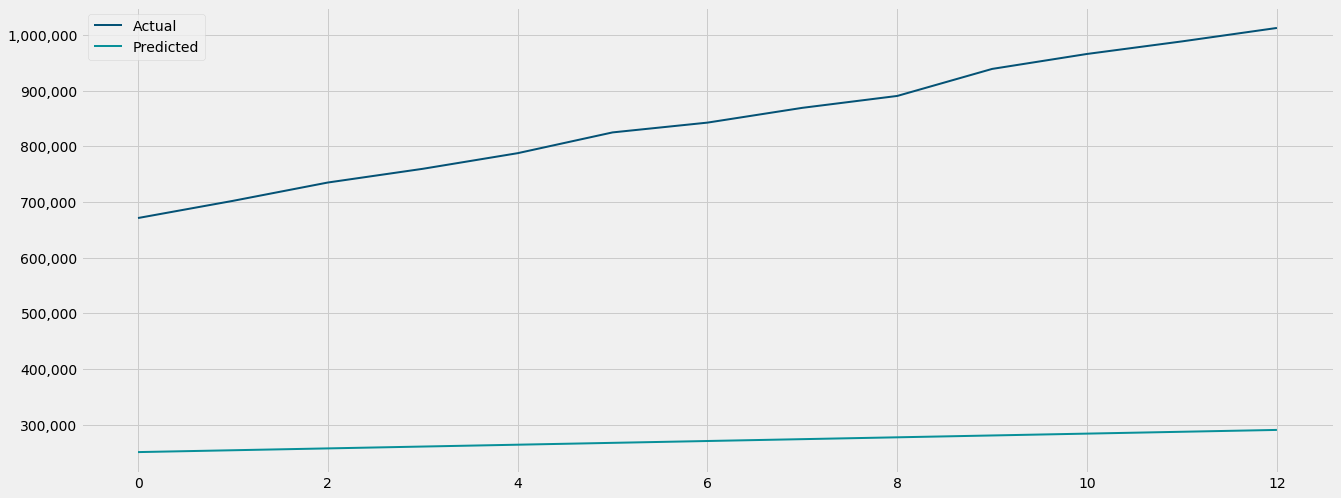

In [57]:
plot = df.plot(figsize=(20,8), color=list(colors.values()), linewidth=2, legend=True)
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

[ 153178.2286856 -432063.9451423]


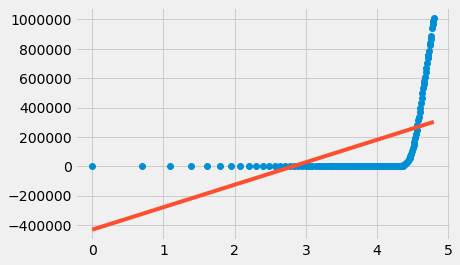

In [58]:
log_x_data = np.log(x_data)
log_y_data = np.log(y_data)
curve_fit = np.polyfit(log_x_data, y_data, 1)
print(curve_fit)

y = 153178.2286856 * log_x_data -432063.9451423
plt.plot(log_x_data, y_data, "o",)
plt.plot(log_x_data, y,)



In [59]:
espanha_data = pd.read_csv("/home/joao/Downloads/espanha.csv")
espanha_data["dateRep"] = pd.to_datetime(dados.dateRep,format='%d/%m/%Y')

espanha_data = espanha_data.sort_values(['year','month','day'], ascending=[1,1,1])

espanha_data.reset_index(inplace = True)

espanha_data.drop(columns="index",inplace=True)

x_data = espanha_data.daysPass.values
y_data = espanha_data.summedCases.values


x = espanha_data.daysPass.values.reshape(-1,1) 
y = espanha_data.summedCases.values.reshape(-1,1)


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1,random_state=0,shuffle=False)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)


#regressor = LinearRegression()  
#regressor.fit(X_train, y_train) 
#print(X_train)

#y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df


,Actual,Predicted
0,185904,92631.727414
1,190008,93839.086327
2,188578,95046.445240
3,191163,96253.804153
4,194515,97461.163066
5,197142,98668.521978
6,200194,99875.880891
7,202961,101083.239804
8,205905,102290.598717
9,207634,103497.957630


[  42558.23514595 -118347.77717031]


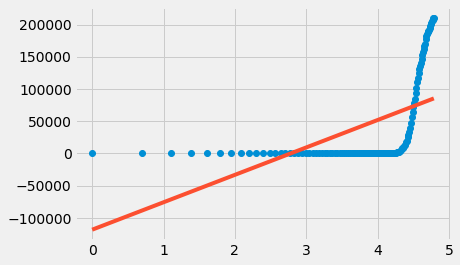

In [60]:
log_x_data = np.log(x_data)
log_y_data = np.log(y_data)
curve_fit = np.polyfit(log_x_data, y_data, 1)
print(curve_fit)

y = 42558.23514595 * log_x_data -118347.77717031
plt.plot(log_x_data, y_data, "o",)
plt.plot(log_x_data, y,)


In [61]:
portugal_data = pd.read_csv("/home/joao/Downloads/portugal.csv")
portugal_data["dateRep"] = pd.to_datetime(dados.dateRep,format='%d/%m/%Y')

portugal_data = portugal_data.sort_values(['year','month','day'], ascending=[1,1,1])

portugal_data.reset_index(inplace = True)

portugal_data.drop(columns="index",inplace=True)

x_data = portugal_data.daysPass.values
y_data = portugal_data.summedCases.values


x = portugal_data.daysPass.values.reshape(-1,1) 
y = portugal_data.summedCases.values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1,random_state=0,shuffle=False)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)


#regressor = LinearRegression()  
#regressor.fit(X_train, y_train) 
#print(X_train)

#y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,22353,20355.739819
1,22797,20840.947708
2,23392,21326.155596
3,23864,21811.363485
4,24027,22296.571374
5,24322,22781.779262


[  7685.10431758 -14761.86938461]


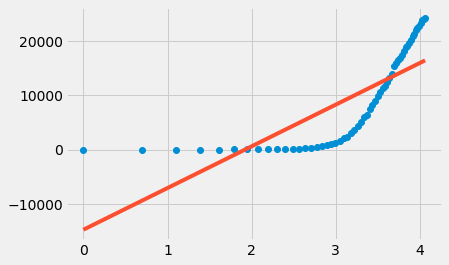

In [64]:
log_x_data = np.log(x_data)
log_y_data = np.log(y_data)
curve_fit = np.polyfit(log_x_data, y_data, 1)
print(curve_fit)

y = 7685.10431758 * log_x_data -14761.86938461
plt.plot(log_x_data, y_data, "o",)
plt.plot(log_x_data, y,)


# Conclusões dos modelos

Tal como o previsto o modelo de regressão linear não se aquequa ao problema, visto que o crescimento é exponencial, sendo incapaz de prever corretamente ou com o minimo de erro o numero de casos confirmados.
Na próxima etapa iremos tentar aplicar redes neuronais e analisar o seu comportamento.